In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\orteg\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("model_only_data.csv")

In [3]:
df.head()

,Unnamed: 0,amount_requested,reason_for_loan,debt_to_income_ratio,zip_code,state,emp_length,policy_code,applicant_result
0,0,9600.0,Credit card refinancing,24.45,816xx,CO,4 years,1,1
1,1,6000.0,Home improvement,14.34,210xx,MD,10+ years,1,1
2,2,10000.0,Debt consolidation,25.35,890xx,NV,7 years,1,1
3,3,25000.0,Debt consolidation,7.17,640xx,MO,5 years,1,1
4,4,2000.0,Other,9.30,923xx,CA,4 years,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   amount_requested      200000 non-null  float64
 2   reason_for_loan       200000 non-null  object 
 3   debt_to_income_ratio  200000 non-null  float64
 4   zip_code              200000 non-null  object 
 5   state                 200000 non-null  object 
 6   emp_length            200000 non-null  object 
 7   policy_code           200000 non-null  int64  
 8   applicant_result      200000 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 13.7+ MB


In [5]:
question_one = df[['applicant_result', 'emp_length']]

In [6]:
x = np.arange(len(pd.unique(question_one['emp_length'])))
y1 = question_one['emp_length'][question_one['applicant_result'] == 1].value_counts().sort_index().values
y2 = question_one['emp_length'][question_one['applicant_result'] == 0].value_counts().sort_index().values

In [7]:
temp = y1[0]
y1[0] = y1[10]
temp2 = y1[1]
y1[1] = temp
y1[10] = temp2
temp = y2[0]
y2[0] = y2[10]
temp2 = y2[1]
y2[1] = temp
y2[10] = temp2

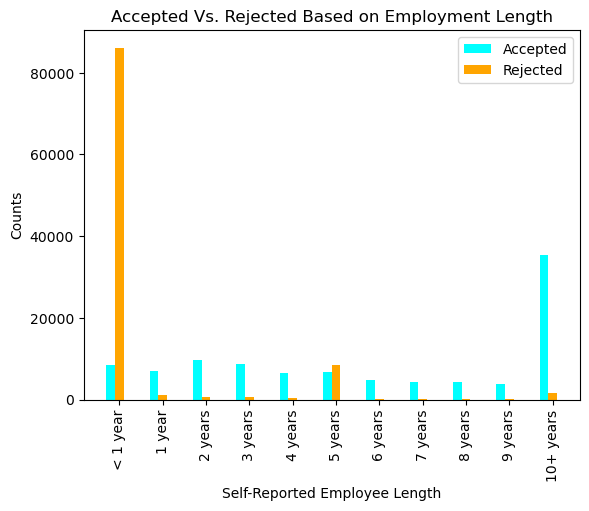

In [8]:
width = 0.2

plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years'
              , '9 years', '10+ years'], rotation=90)
plt.xlabel("Self-Reported Employee Length")
plt.ylabel("Counts")
plt.title("Accepted Vs. Rejected Based on Employment Length")
plt.legend(["Accepted", "Rejected"])
plt.show()